In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import csv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from matplotlib.dates import DateFormatter
import plotly.graph_objects as go


In [3]:
climate = pd.read_csv('/kaggle/input/jena-climate/jena_climate_2009_2016.csv')
climate.info()
climate.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [4]:
# Assume your DataFrame is named 'df'
new_column_names = {
    'p (mbar)': 'Pressure (mbar)',
    'T (degC)': 'Temperature (degC)',
    'Tpot (K)': 'Potential Temperature (K)',
    'Tdew (degC)': 'Dew Point Temperature (degC)',
    'rh (%)': 'Relative Humidity (%)',
    'VPmax (mbar)': 'Maximum Vapor Pressure (mbar)',
    'VPact (mbar)': 'Actual Vapor Pressure (mbar)',
    'VPdef (mbar)': 'Vapor Pressure Deficit (mbar)',
    'sh (g/kg)': 'Specific Humidity (g/kg)',
    'H2OC (mmol/mol)': 'Water Vapor Concentration (mmol/mol)',
    'rho (g/m**3)': 'Air Density (g/m^3)',
    'wv (m/s)': 'Wind Speed (m/s)',
    'max. wv (m/s)': 'Maximum Wind Speed (m/s)',
    'wd (deg)': 'Wind Direction (deg)',

}

# Rename the columns
climate.rename(columns=new_column_names, inplace=True)


## Finding missing columns

In [5]:
def missing_col(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values.sort_values(ascending = False)

    return missing_values

missing_columns = missing_col(climate)
print(missing_columns)

Date Time                               0
Pressure (mbar)                         0
Temperature (degC)                      0
Potential Temperature (K)               0
Dew Point Temperature (degC)            0
Relative Humidity (%)                   0
Maximum Vapor Pressure (mbar)           0
Actual Vapor Pressure (mbar)            0
Vapor Pressure Deficit (mbar)           0
Specific Humidity (g/kg)                0
Water Vapor Concentration (mmol/mol)    0
Air Density (g/m^3)                     0
Wind Speed (m/s)                        0
Maximum Wind Speed (m/s)                0
Wind Direction (deg)                    0
dtype: int64


## Dropping Duplicates

In [6]:
climate['Date Time'] = pd.to_datetime(climate['Date Time'], format = "%d.%m.%Y %H:%M:%S" ) #change date time format
climate['Year'] = climate['Date Time'].dt.year
climate['Month'] = climate['Date Time'].dt.month

climate = climate.drop_duplicates().reset_index(drop = True)

In [32]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420224 entries, 0 to 420223
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date Time                             420224 non-null  datetime64[ns]
 1   Pressure (mbar)                       420224 non-null  float64       
 2   Temperature (degC)                    420224 non-null  float64       
 3   Potential Temperature (K)             420224 non-null  float64       
 4   Dew Point Temperature (degC)          420224 non-null  float64       
 5   Relative Humidity (%)                 420224 non-null  float64       
 6   Maximum Vapor Pressure (mbar)         420224 non-null  float64       
 7   Actual Vapor Pressure (mbar)          420224 non-null  float64       
 8   Vapor Pressure Deficit (mbar)         420224 non-null  float64       
 9   Specific Humidity (g/kg)              420224 non-null  floa

In [7]:
climate.head()

Date Time  Pressure (mbar)  Temperature (degC)  \
0 2009-01-01 00:10:00           996.52               -8.02   
1 2009-01-01 00:20:00           996.57               -8.41   
2 2009-01-01 00:30:00           996.53               -8.51   
3 2009-01-01 00:40:00           996.51               -8.31   
4 2009-01-01 00:50:00           996.51               -8.27   

   Potential Temperature (K)  Dew Point Temperature (degC)  \
0                     265.40                         -8.90   
1                     265.01                         -9.28   
2                     264.91                         -9.31   
3                     265.12                         -9.07   
4                     265.15                         -9.04   

   Relative Humidity (%)  Maximum Vapor Pressure (mbar)  \
0                   93.3                           3.33   
1                   93.4                           3.23   
2                   93.9                           3.21   
3                   94.2                           3.26   
4                   94.1                           3.27   

   Actual Vapor Pressure (mbar)  Vapor Pressure Deficit (mbar)  \
0                          3.11                           0.22   
1                          3.02                           0.21   
2                          3.01                           0.20   
3                          3.07                           0.19   
4                          3.08                           0.19   

   Specific Humidity (g/kg)  Water Vapor Concentration (mmol/mol)  \
0                      1.94                                  3.12   
1                      1.89                                  3.03   
2                      1.88                                  3.02   
3                      1.92                                  3.08   
4                      1.92                                  3.09   

   Air Density (g/m^3)  Wind Speed (m/s)  Maximum Wind Speed (m/s)  \
0              1307.75              1.03                      1.75   
1              1309.80              0.72                      1.50   
2              1310.24              0.19                      0.63   
3              1309.19              0.34                      0.50   
4              1309.00              0.32                      0.63   

   Wind Direction (deg)  Year  Month  
0                 152.3  2009      1  
1                 136.1  2009      1  
2                 171.6  2009      1  
3                 198.0  2009      1  
4                 214.3  2009      1

In [9]:
def parse_data_from_dataframe(df):
    times = []
    temperatures = []

    count = 0
    for temp in df['Temperature (degC)']:
        temp_float = float(temp)
        temperatures.append(temp_float)
        times.append(int(count))
        count += 1

    return times, temperatures


In [10]:

times, temperatures = parse_data_from_dataframe(climate)
time = np.array(times)
series = np.array(temperatures)
split_time = 294000
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000

In [11]:
len(series)

420224

[]

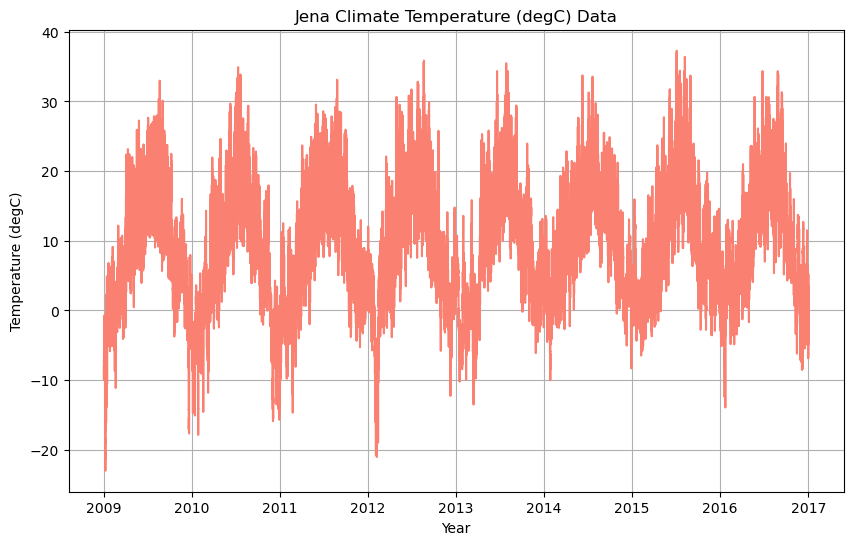

In [34]:
    plt.figure(figsize=(10, 6))
    plt.plot(climate['Date Time'], climate["Temperature (degC)"], color='salmon')
    plt.xlabel('Year')
    plt.ylabel('Temperature (degC)')
    plt.title(f'Jena Climate Temperature (degC) Data')
    plt.grid(True)
    plt.plot()


## Splitting the dataset

In [54]:
def train_val_split(time, series, time_step):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_trainset, time_valid, series_validset = train_val_split(climate.index, series, split_time)


In [55]:
#function to create a window from the dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    data = []
    for i in range(len(series) - window_size):
        data.append(series[i:i+window_size+1])
    data = np.array(data)

    X = data[:, :-1]
    y = data[:, -1]

    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(shuffle_buffer).batch(batch_size).prefetch(1)

    return dataset


In [56]:
training_data = windowed_dataset(series_trainset,window_size, batch_size , shuffle_buffer_size)

In [15]:
len(training_data)

1149

## The Model

In [16]:
def create_uncompiled_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1,
                               activation='relu', input_shape=[64,1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    return model

In [17]:
#checking whether the predicted label and the actual label y have the same shape
def test_model_prediction(training_data):
    for X_batch, y_batch in training_data.take(1):  # Take one batch
        print("Input (X) Batch:")
        print(X_batch)

        uncompiled_model = create_uncompiled_model()
        y_batch = y_batch.numpy().squeeze()
        print("Target (y) Batch:")
        print(y_batch)
        print("\n")

        print(f'Testing model prediction with input of shape {X_batch.shape}...')
        y_pred = uncompiled_model.predict(X_batch)

        y_pred_shape = y_pred.squeeze().shape

        assert y_pred_shape == y_batch.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                               f'whereas actual y shape = {y_batch.shape}.')

        break

    print("Your current architecture is compatible with the windowed dataset! :)")


test_model_prediction(training_data)


Input (X) Batch:
tf.Tensor(
[[-10.32 -10.41 -10.44 ... -16.9  -16.89 -16.97]
 [ -1.44  -1.42  -1.44 ...  -3.11  -3.18  -3.23]
 [ -3.36  -3.46  -3.53 ... -10.07 -10.18 -10.32]
 ...
 [ -2.62  -2.54  -2.14 ...  -5.2   -5.48  -5.5 ]
 [ -8.81  -8.84  -8.94 ...  -5.83  -5.76  -5.9 ]
 [ -2.78  -2.76  -2.76 ...  -0.86  -0.9   -0.89]], shape=(256, 64), dtype=float64)
Target (y) Batch:
[-17.02  -3.24 -10.41  -9.93 -11.09  -7.88  -0.99  -0.96  -0.94  -6.74
  -8.55  -2.54 -18.77  -2.18 -22.25  -5.74  -4.08  -5.12  -7.8   -1.64
  -1.58  -2.2   -7.46  -0.76 -16.31 -20.34  -4.07  -4.41 -12.47  -4.06
  -8.44 -16.49 -11.96  -3.63  -1.5  -15.2   -1.25  -2.69 -18.37  -4.24
  -6.25 -22.54 -16.02 -22.1   -1.51  -4.69  -2.54  -1.29  -1.6   -4.15
  -2.26  -4.57  -3.91  -3.36 -13.62 -10.12  -1.3  -11.32 -15.04  -3.2
  -1.21  -8.51  -1.46 -15.69  -4.86  -4.5   -6.39  -1.05  -5.11  -8.65
  -4.43  -1.47  -4.16 -21.8  -10.53  -7.38 -15.06  -6.23 -22.2   -4.66
  -4.93 -22.41 -21.32  -1.44  -4.2   -6.21 -10.6   -4.

## Plotting different learning rates to get the best one

In [18]:
def adjust_learning_rate(dataset):

    model = create_uncompiled_model()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])


    history = model.fit(dataset,epochs=30, callbacks=[lr_schedule])

    return history


lr_history = adjust_learning_rate(training_data)

Epoch 1/30
1149/1149 [==============================] - 25s 16ms/step - loss: 5.0359 - mae: 5.4931 - lr: 1.0000e-04
Epoch 2/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.8272 - mae: 1.1547 - lr: 1.1220e-04
Epoch 3/30
1149/1149 [==============================] - 18s 15ms/step - loss: 0.5333 - mae: 0.8117 - lr: 1.2589e-04
Epoch 4/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.2748 - mae: 0.5221 - lr: 1.4125e-04
Epoch 5/30
1149/1149 [==============================] - 18s 15ms/step - loss: 0.1435 - mae: 0.3652 - lr: 1.5849e-04
Epoch 6/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.0970 - mae: 0.3047 - lr: 1.7783e-04
Epoch 7/30
1149/1149 [==============================] - 18s 15ms/step - loss: 0.0772 - mae: 0.2750 - lr: 1.9953e-04
Epoch 8/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.0690 - mae: 0.2594 - lr: 2.2387e-04
Epoch 9/30
1149/1149 [==============================] - 18s 15ms/step - 

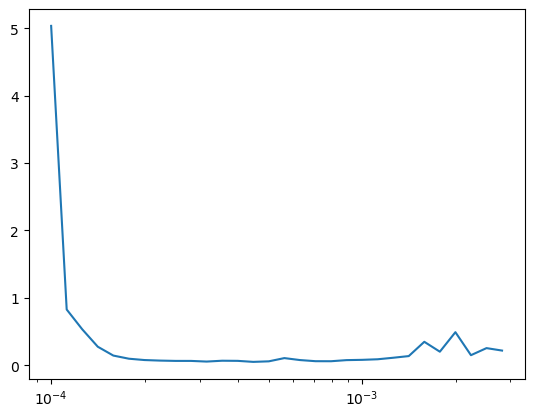

In [19]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.show()

## Training the Model

In [20]:
def create_model():


    model = create_uncompiled_model()

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate = 1e-3),
                  metrics=["mae"])

    return model

In [21]:
# Save an instance of the model
model = create_model()
history = model.fit(training_data, epochs=30)

Epoch 1/30
1149/1149 [==============================] - 23s 15ms/step - loss: 1.3599 - mae: 1.7111
Epoch 2/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.1508 - mae: 0.3925
Epoch 3/30
1149/1149 [==============================] - 18s 15ms/step - loss: 0.1014 - mae: 0.3029
Epoch 4/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.0672 - mae: 0.2430
Epoch 5/30
1149/1149 [==============================] - 18s 16ms/step - loss: 0.0695 - mae: 0.2462
Epoch 6/30
1149/1149 [==============================] - 18s 15ms/step - loss: 0.1032 - mae: 0.2929
Epoch 7/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.0489 - mae: 0.2050
Epoch 8/30
1149/1149 [==============================] - 18s 16ms/step - loss: 0.0398 - mae: 0.1883
Epoch 9/30
1149/1149 [==============================] - 17s 15ms/step - loss: 0.0412 - mae: 0.1899
Epoch 10/30
1149/1149 [==============================] - 18s 16ms/step - loss: 0.0358 - mae: 0.1754
Epoch 11/

## Evaluating the Model

In [39]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(128).prefetch(1)
    forecast = model.predict(ds)
    return forecast

def plot_series(time, series, format="-", start=0, end=None, label = None, color = None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    


3283/3283 [==============================] - 73s 22ms/step


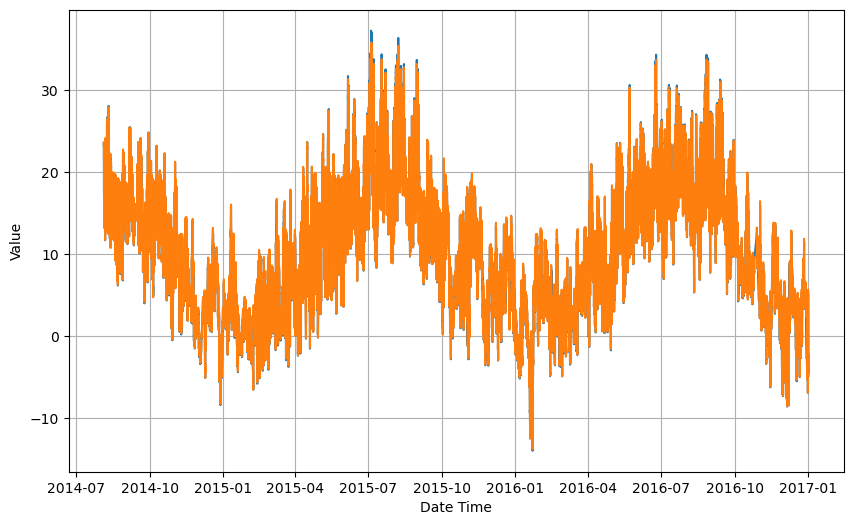

In [59]:
#plotting predicted values vs actual values of the validation data
forecast = model_forecast(model, series, window_size).squeeze()
temp_forecast = forecast[split_time - window_size:-1]

plt.figure(figsize=(10, 6))
plot_series(time_valid, series_validset)
plot_series(time_valid, temp_forecast)

In [60]:
mse, mae = compute_metrics(series_validset, temp_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 0.06, mae: 0.18 for forecast


## Plotting Predictions

In [89]:
climate.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:30:00', '2016-12-31 22:40:00',
               '2016-12-31 22:50:00', '2016-12-31 23:00:00',
               '2016-12-31 23:10:00', '2016-12-31 23:20:00',
               '2016-12-31 23:30:00', '2016-12-31 23:40:00',
               '2016-12-31 23:50:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=420224, freq=None)

In [107]:

def plot_future_forecast(model, series, time_valid, window_size, future_months=36):
    last_timestamp = time_valid[-1]
    future_time_steps = future_months * 30 * 24 * 6  # Assuming 30 days per month (24 hours * 6 10-minute intervals per hour)
    future_time = pd.date_range(start=last_timestamp, periods=future_time_steps+1, freq='10T')[1:]

    future_forecast = model_forecast(model, series, window_size).squeeze()
    future_forecast = future_forecast[-future_time_steps:]

    # Create a Plotly figure
    fig = go.Figure()

    # Plot the actual data
    fig.add_trace(go.Scatter(x=time_valid, y=series, mode='lines', name='Actual Data', line=dict(color='salmon')))

    # Plot the predicted data (future forecast)
    fig.add_trace(go.Scatter(x=future_time, y=future_forecast, mode='lines', name='Predicted Data (Future)', line=dict(color='green')))

    # Set axis labels and title
    fig.update_layout(title='Actual vs. Predicted Data', xaxis_title='Time', yaxis_title='Value', width=1000, height=600)

    # Increase the y-axis range to place the future forecast trace above the plot
    y_range_padding = (max(future_forecast) - min(future_forecast)) * 0.1  
    fig.update_yaxes(range=[min(future_forecast) - y_range_padding, max(future_forecast) + y_range_padding])

    # Show the figure
    fig.show()


In [108]:
window_size = 64
future_months = 36

plot_future_forecast(model, series_validset, time_valid, window_size, future_months)

986/986 [==============================] - 21s 22ms/step
